## Import data and libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt

#machine learning libraries:
from sklearn.linear_model import LogisticRegression

#evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'wine\Wine dataset.csv')
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data review

In [3]:
data.shape

(178, 14)

In [4]:
data.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

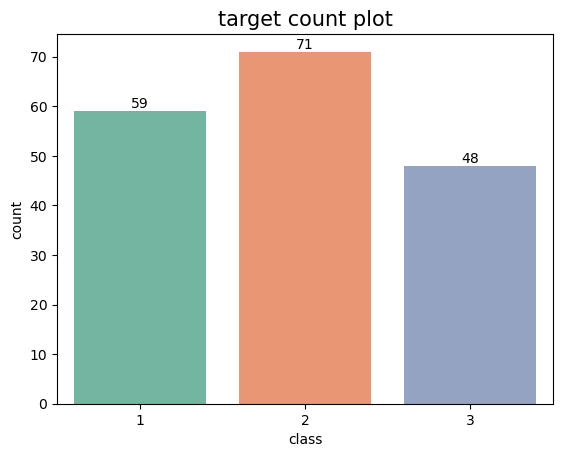

In [6]:
plt.title('target count plot', size=15)
ax = sns.countplot(data=data, x='class' ,palette="Set2")
ax.bar_label(ax.containers[0]);

### Observations :

* Dataset has `178` rows and `14` columns. All columns are numerical.
<br>

* Dataset have no missing data.
<br>

* target column has 3 classes:
    * class 1 counted 59.
    * class 2 counted 71.
    * class 3 counted 48.

## Data visualization

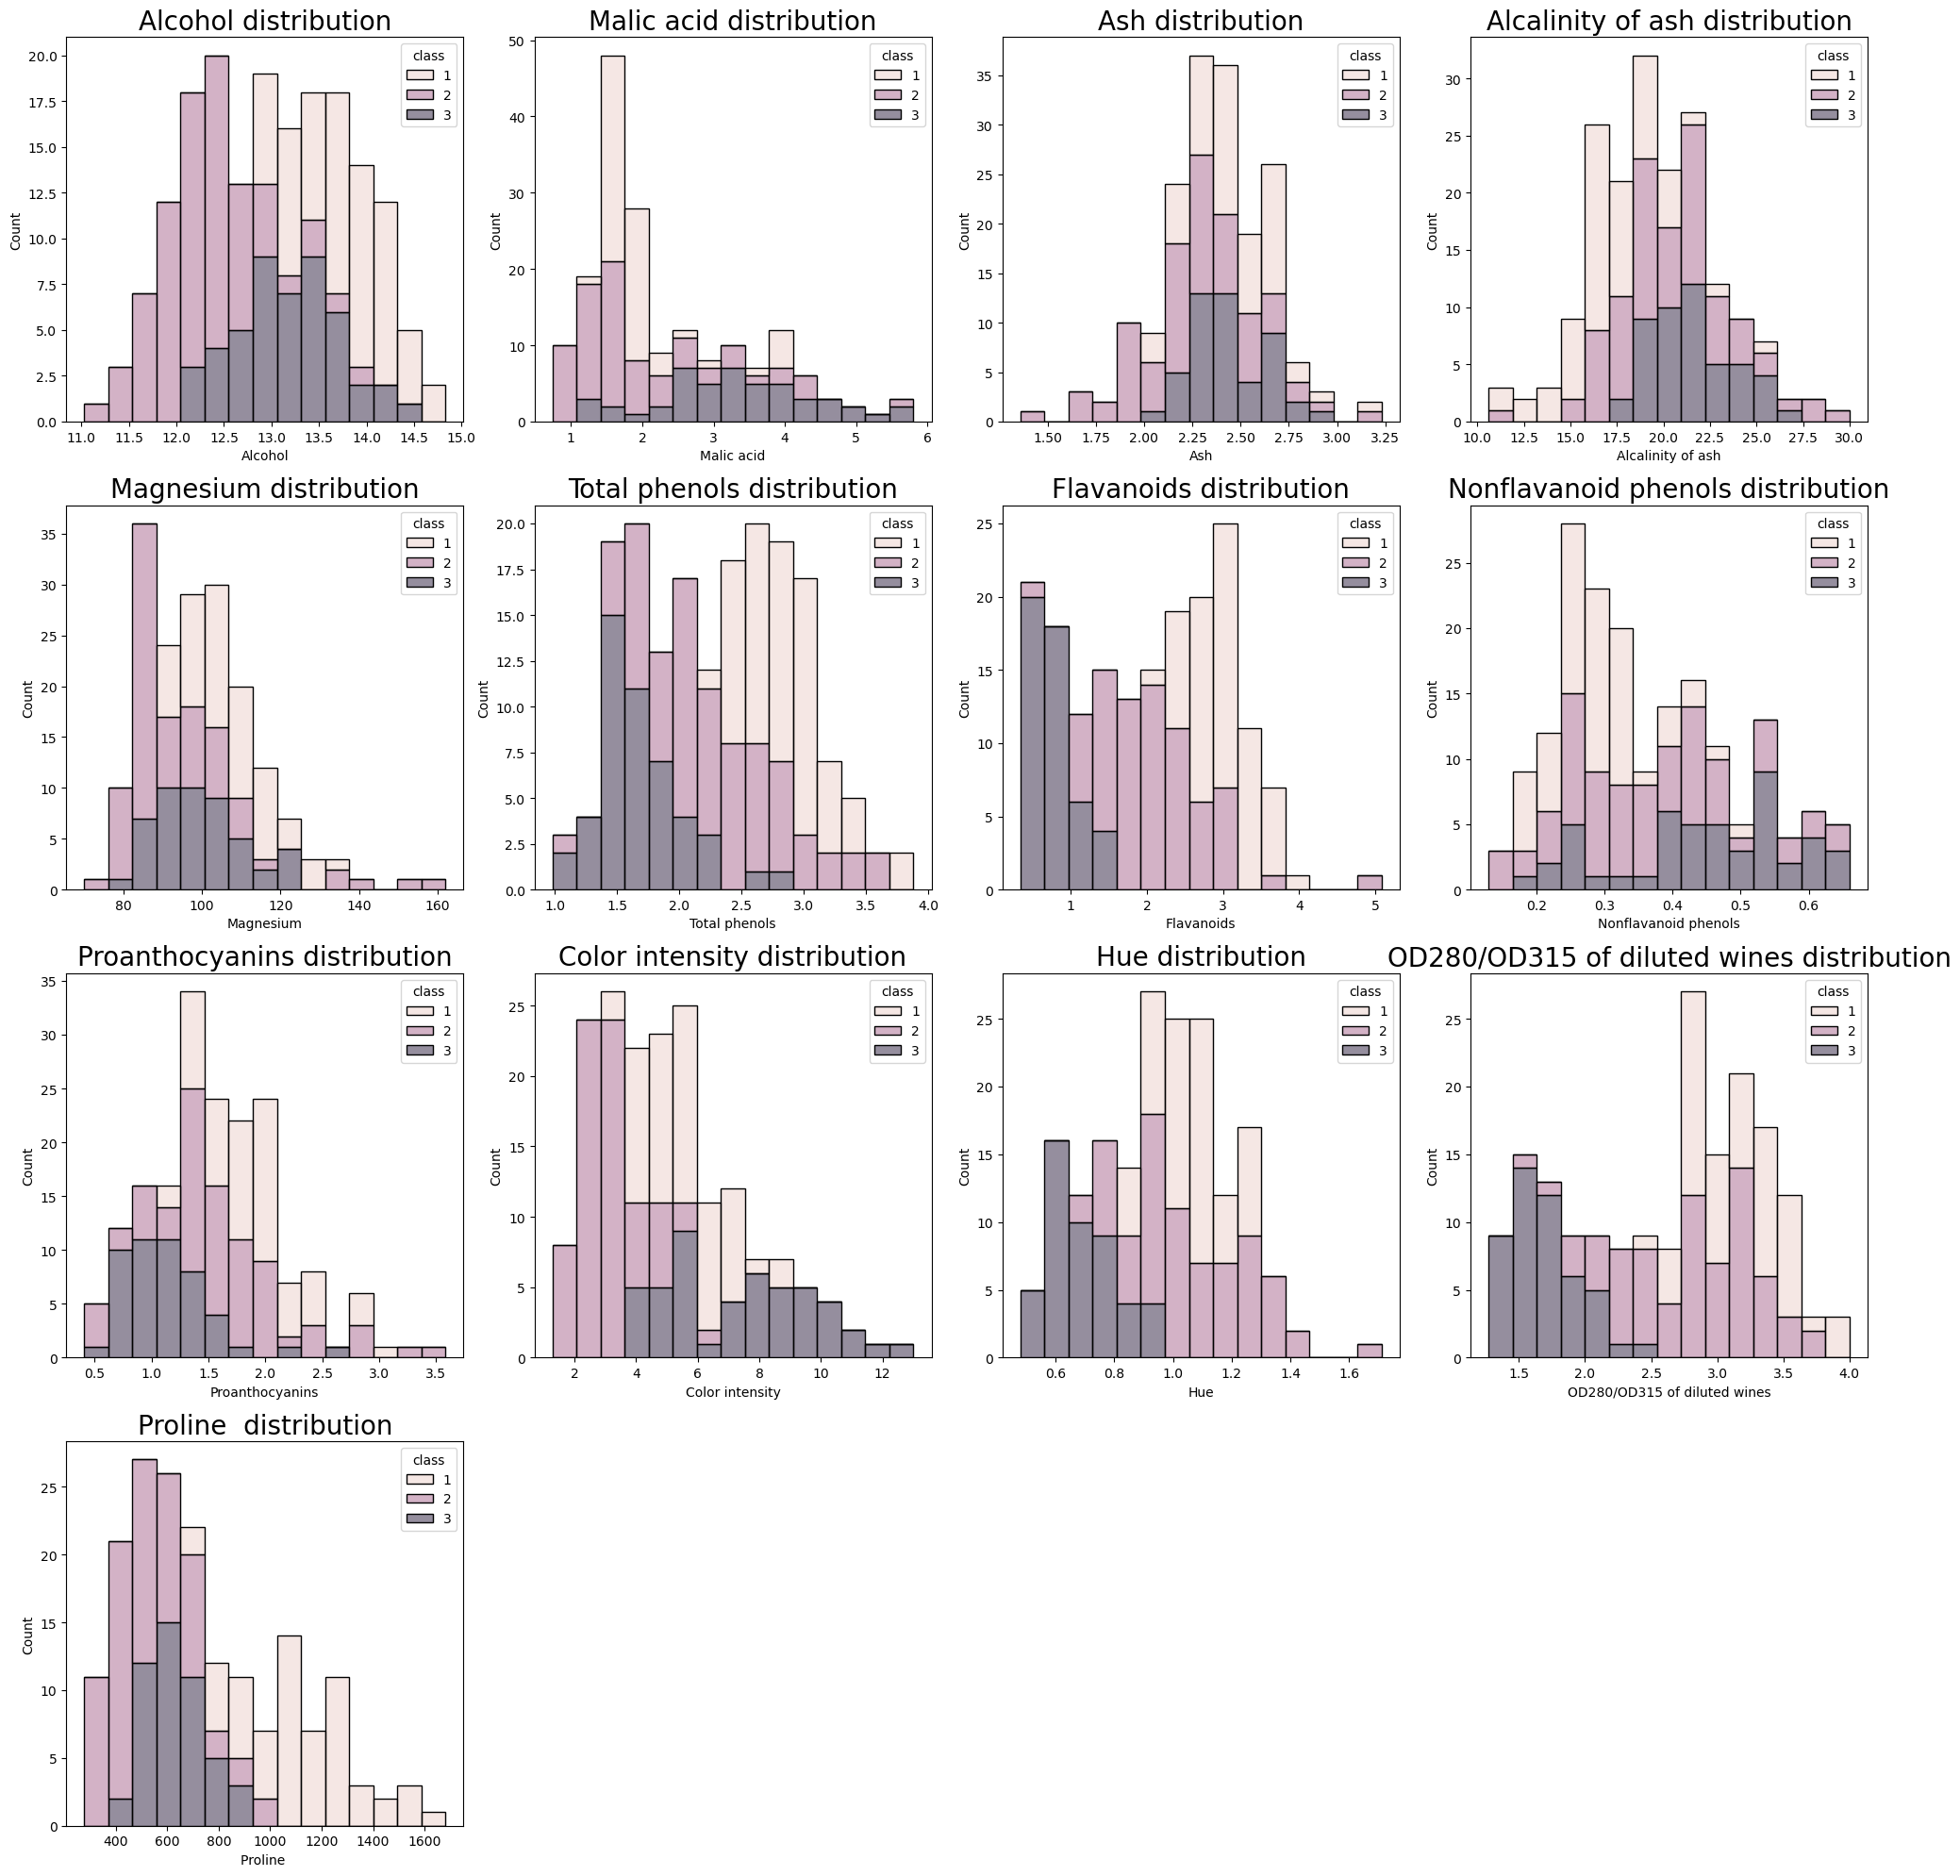

In [7]:
# histgram
plt.figure(figsize=(20, 20))

i=1 
for col in data.drop(columns='class'):
    
    plt.subplot(4, 4, i)
    sns.histplot(data=data, x=col, hue='class', bins=15, multiple="stack", alpha=.5 )  
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

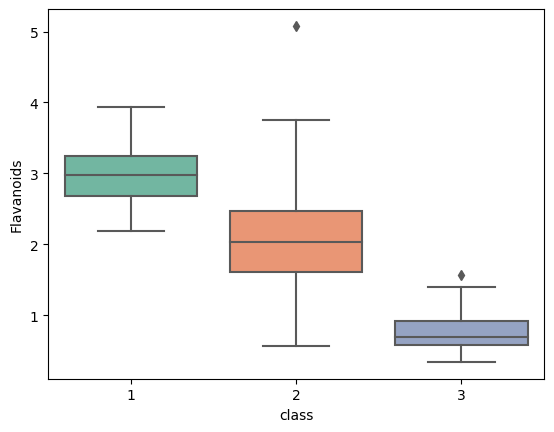

In [8]:
# Create boxplot
sns.boxplot(data=data ,x="class" , y= "Flavanoids", palette='Set2');

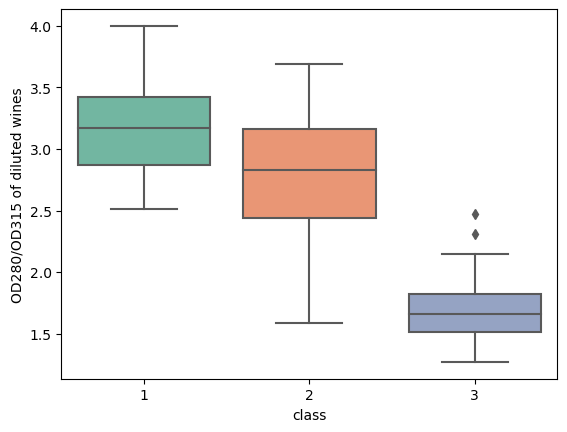

In [9]:
# Create boxplot
sns.boxplot(data=data ,x="class" , y= "OD280/OD315 of diluted wines", palette='Set2');

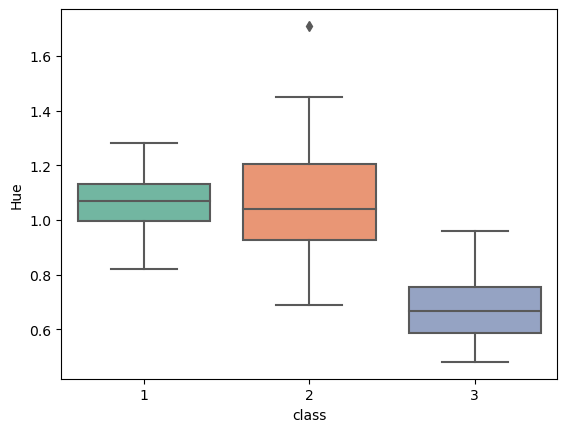

In [10]:
# Create boxplot
sns.boxplot(data=data ,x="class" , y= "Hue", palette='Set2');

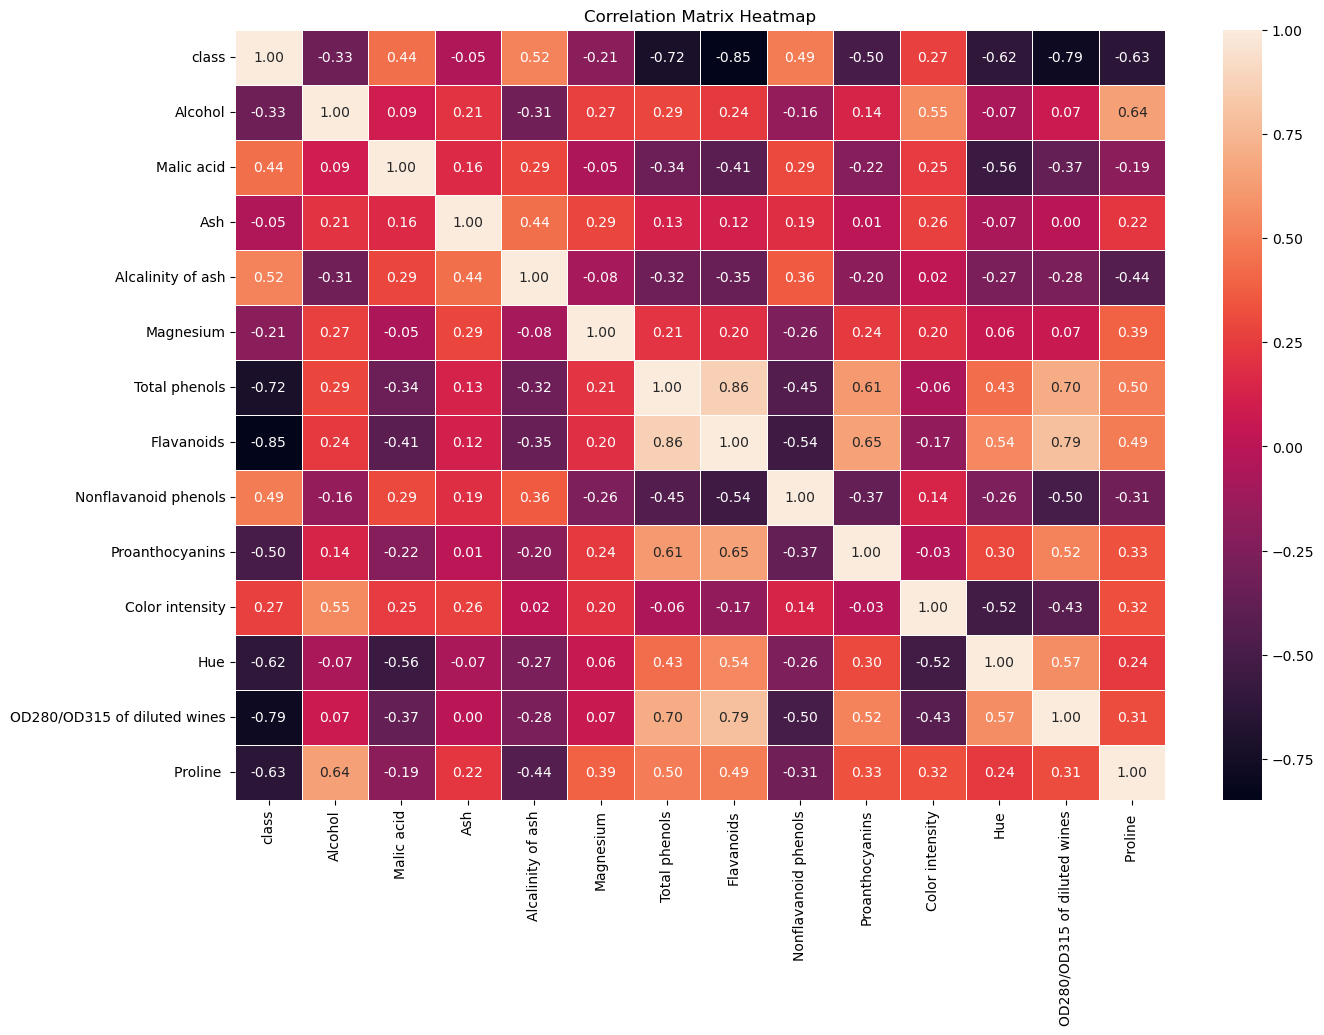

In [11]:
# Compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


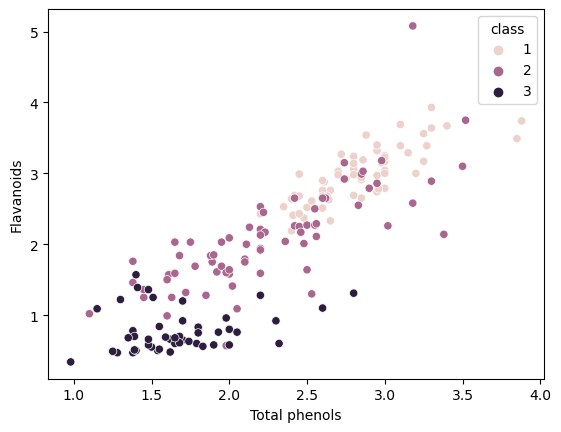

In [12]:
sns.scatterplot(data=data, x='Total phenols', y='Flavanoids', hue='class' );

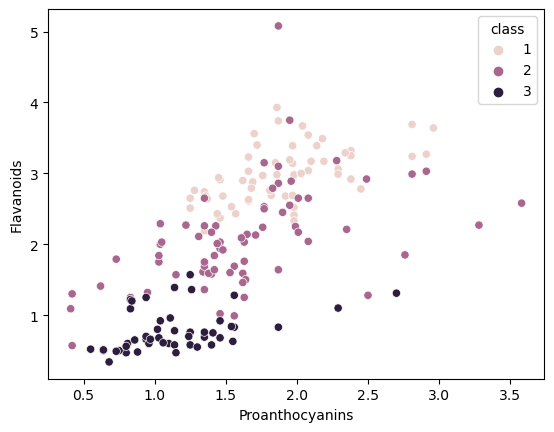

In [13]:
sns.scatterplot(data=data, x='Proanthocyanins', y='Flavanoids', hue='class' );

## Modeling

In [14]:
X= data.drop(columns='class')
y= data['class']

## Logistics regression : 
Logistics regression uses sigmoid function to return the probability of a label. It is widely used when the classification problem is binary — true or false, win or lose, positive or negative ...


**Logistics regression equation**
<p class="formulaDsp">
\[ Y_i = \frac{1}{1 + e^{-\beta_0 - \beta_1x_1 - \beta_2x_2 - \ldots - \beta_nx_n}} \]
</p>

<br>

The logistic function looks like a big S and will transform any value into the range 0 to 1. This is useful because we can apply a rule to the output of the logistic function to snap values to 0 and 1 (e.g. IF less than 0.5 then output 1) and predict a class value.

* Good accuracy for many simple data sets
* Resistant to overfitting* Easily extend to multiple classes (multinomial regression)

####  some advantages of Logistic Regression: 
1) Good accuracy for many simple data sets

2) Resistant to overfitting 

3) Easily extend to multiple classes (multinomial regression)


In [15]:
#build a model
LR_model= LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500)

#fitting
LR_model.fit(X, y)

#predictions
prediction = LR_model.predict(X)

In [19]:
#Calculate the accuracy scores for your models.
accuracy = metrics.accuracy_score(y , prediction)

print("Accuracy:", round(accuracy, 3))

Accuracy: 0.983


In [22]:
cm = metrics.confusion_matrix(y, prediction)
print(metrics.classification_report(y, prediction))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.97      0.99      0.98        71
           3       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



Text(50.722222222222214, 0.5, 'True')

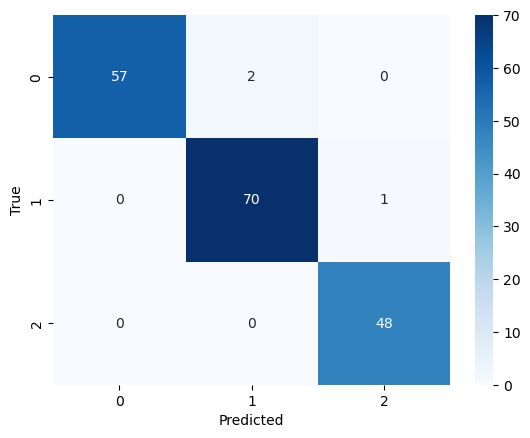

In [18]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [23]:
y_pred_proba = LR_model.predict_proba(X)
print(y_pred_proba[:5])

[[9.99391122e-01 5.46420423e-04 6.24574324e-05]
 [9.99914107e-01 7.60493956e-05 9.84325201e-06]
 [9.99939489e-01 4.03991366e-05 2.01114156e-05]
 [9.99999143e-01 2.33499582e-08 8.33557811e-07]
 [3.38697668e-01 6.41459233e-01 1.98430992e-02]]


In [24]:
#Extract the feature names and importances from your model
importances = LR_model.coef_[0]
features = X.columns

odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios

Alcohol                         0.655367
Alcalinity of ash               0.722301
Hue                             0.907246
Proanthocyanins                 0.951911
Magnesium                       0.979260
Nonflavanoid phenols            0.996358
Proline                         1.009815
Color intensity                 1.220573
Total phenols                   1.245944
Malic acid                      1.592785
Ash                             1.763871
OD280/OD315 of diluted wines    2.037747
Flavanoids                      2.500902
dtype: float64

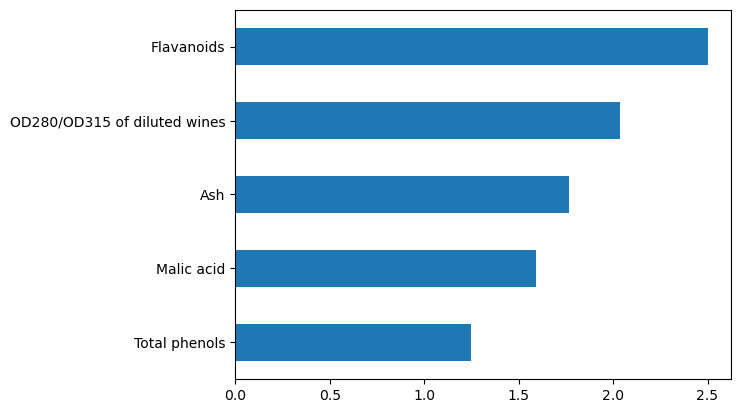

In [25]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh" );